# Quais os jogadores mais superfaturados da NBA?

## Preparação de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('nba_stats.csv')

In [17]:
# Remove object columns
df = df.drop(columns=[
    'playerSlug',
    'status',
    'teamId',
    'status'
    'position',
    'college',
    'draftinfo',
    'birthplace',
    'team',
    'experience',
    'position',
    'rankingSalary',
    'htwt'
], errors='ignore')

# Remove non average columns
df = df.drop(columns=[
    'flagrantFouls',
    'technicalFouls',
    'ejections',
    'doubleDouble',
    'tripleDouble',
    'minutes',
    'rebounds',
    'fouls',
    'points',
    'assists',
    'turnovers',
    'steals',
    'blocks',
    'fieldGoalsMade',
    'fieldGoalsAttempted',
    'threePointFieldGoalsMade',
    'threePointFieldGoalsAttempted',
    'freeThrowsMade',
    'freeThrowsAttempted',
    ], errors='ignore')

In [18]:
df['birthyear'] = df['birthdate'].str.extract(r'(\d{4})').astype(int)
df['age'] = df['year'].astype(int) - df['birthyear']

df['salary'] = df['salary'].str.replace('$', '').str.replace(',', '').astype(int)

# remove object columns
df = df.drop(columns=[
    'birthdate'
    ], errors='ignore')

In [19]:
position_mapping = {'G': 0.0, 'F': 2.0, 'C': 1.0, 'PG': 0.0, 'PF': 2.0, 'SF': 2.0, 'SG': 0.0, 'GF': 1.0}
df['position'] = df['positionId'].map(position_mapping)
df = df.drop(columns=['positionId'])
df.dropna()

,year,name,playerId,gamesPlayed,avgMinutes,avgFouls,avgRebounds,avgPoints,avgFieldGoalsMade,avgFieldGoalsAttempted,...,avgFreeThrowsAttempted,freeThrowPct,avgAssists,avgTurnovers,avgSteals,avgBlocks,salary,birthyear,age,position
0,1999,Allen Iverson,366,48.0,41.458332,2.041667,4.916666,26.750000,9.062500,22.000000,...,9.875000,75.105003,4.645834,3.479167,2.291667,0.145833,9000000,1975,24,0.0
1,2000,Allen Iverson,366,70.0,40.757140,2.314286,3.814286,28.414286,10.414286,24.757143,...,8.857142,71.290001,4.685714,3.285714,2.057143,0.071429,10125000,1975,25,0.0
2,2001,Allen Iverson,366,71.0,41.957745,2.070423,3.845070,31.084507,10.732394,25.535212,...,10.126760,81.362999,4.577465,3.338028,2.507042,0.281690,11250000,1975,26,0.0
3,2002,Allen Iverson,366,60.0,43.700000,1.700000,4.483333,31.383333,11.083333,27.816668,...,9.750000,81.196999,5.516667,3.950000,2.800000,0.216667,12375000,1975,27,0.0
4,2003,Allen Iverson,366,82.0,42.500000,1.817073,4.195122,27.585365,9.804878,23.658537,...,8.975610,77.445999,5.536585,3.487805,2.743902,0.158537,13500000,1975,28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,2023,Peyton Watson,4576087,23.0,8.086957,0.608696,1.608696,3.260870,1.260870,2.565218,...,0.869565,55.000000,0.478261,0.347826,0.086957,0.478261,2303520,2002,21,2.0
8158,2023,Josh Minott,4687718,15.0,6.400000,0.666667,1.666667,3.066667,1.200000,2.400000,...,0.533333,100.000000,0.333333,0.200000,0.266667,0.400000,1719864,2002,21,2.0
8159,2023,Dalen Terry,4433159,38.0,5.631579,0.631579,0.973684,2.236842,0.842105,1.894737,...,0.552632,66.667000,0.578947,0.210526,0.289474,0.131579,3350760,2002,21,2.0
8160,2023,Ryan Rollins,4591725,12.0,5.166666,0.833333,1.000000,1.916667,0.583333,1.666667,...,0.500000,100.000000,0.500000,1.333333,0.083333,0.083333,1719864,2002,21,0.0


## Correlação

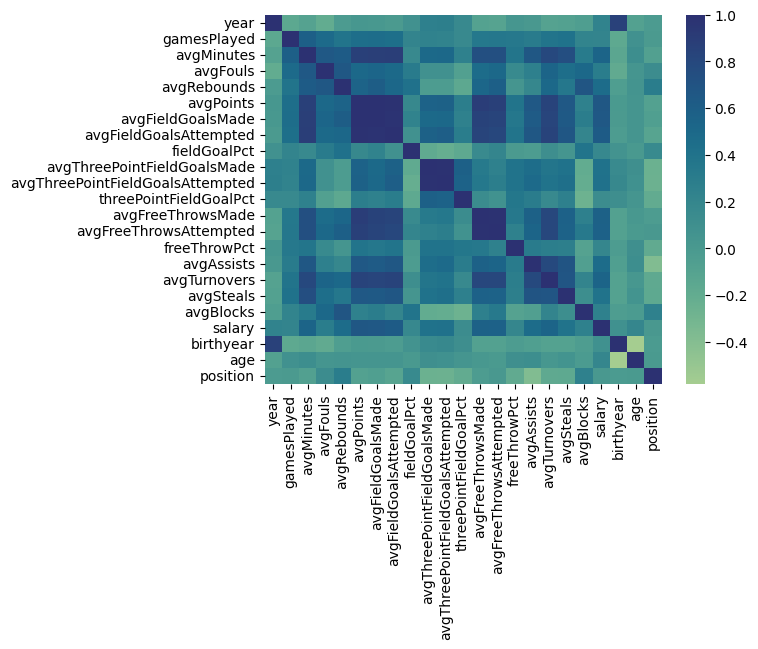

In [20]:
numerical_df = df.drop(columns= ['playerId']).select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()

sns.heatmap(corr_matrix, cmap='crest')
plt.show()

In [21]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8156 entries, 0 to 8161
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              8156 non-null   int64  
 1   name                              8156 non-null   object 
 2   playerId                          8156 non-null   int64  
 3   gamesPlayed                       8156 non-null   float64
 4   avgMinutes                        8156 non-null   float64
 5   avgFouls                          8156 non-null   float64
 6   avgRebounds                       8156 non-null   float64
 7   avgPoints                         8156 non-null   float64
 8   avgFieldGoalsMade                 8156 non-null   float64
 9   avgFieldGoalsAttempted            8156 non-null   float64
 10  fieldGoalPct                      8156 non-null   float64
 11  avgThreePointFieldGoalsMade       8156 non-null   float64
 12  avgThreePoi

## Separação de dados

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

player_ids = df['playerId']
years = df['year']
X = df.drop(columns=['playerId', 'name', 'salary', 'year'])
y = df['salary']

X_train, X_test, y_train, y_test, player_ids_train, player_ids_test, years_train, years_test = train_test_split(
    X, y, player_ids, years, test_size=0.2, random_state=42)

## Treinamento

In [23]:
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

rmse_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    rmse = root_mean_squared_error(y_test, predictions)
    rmse_results[name] = rmse

rmse_df = pd.DataFrame(list(rmse_results.items()), columns=['Model', 'RMSE'])

print(rmse_df)

best_model_name = rmse_df.loc[rmse_df['RMSE'].idxmin()]['Model']
best_rmse = rmse_df['RMSE'].min()

print(f"Best model: {best_model_name} with RMSE: {best_rmse}")


/home/eduardo/workspace/mestrado/ppgia-x500-introducao-a-ciencia-de-dados/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.734e+16, tolerance: 3.319e+13
  model = cd_fast.enet_coordinate_descent(


               Model          RMSE
0  Linear Regression  4.401571e+06
1   Ridge Regression  4.401474e+06
2   Lasso Regression  4.401441e+06
3      Random Forest  3.797183e+06
4  Gradient Boosting  3.785735e+06
5                SVR  7.265005e+06
6      MLP Regressor  4.854009e+06
Best model: Gradient Boosting with RMSE: 3785734.809822966


/home/eduardo/workspace/mestrado/ppgia-x500-introducao-a-ciencia-de-dados/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Estimativas de salários

In [27]:
best_model = models[best_model_name]

best_model.fit(X, y)

df['predicted_salary'] = best_model.predict(X)

In [28]:
df['salary_factor'] = df['salary'] / df['predicted_salary']

In [30]:
print(df[['name', 'year', 'salary', 'predicted_salary', 'salary_factor']].sort_values('salary_factor'))

                  name  year    salary  predicted_salary  salary_factor
2895     Dahntay Jones  2016      5767      4.848279e+06       0.001189
3714       Earl Barron  2010     11679      7.614233e+06       0.001534
5506  Tristan Thompson  2022     10552      6.294867e+06       0.001676
1048        Lamar Odom  2013      8232      3.868114e+06       0.002128
2745    Linton Johnson  2007      4533      2.032267e+06       0.002231
...                ...   ...       ...               ...            ...
336         Shawn Kemp  2002  21500000      3.781597e+06       5.685428
1856   Jonathan Bender  2005   7175000      1.089998e+06       6.582580
3514   Martell Webster  2009   4344000      6.208619e+05       6.996725
1054         Vin Baker  2005  15750000      2.201501e+06       7.154208
5270    Gordon Hayward  2018  31214295      3.069958e+06      10.167661

[8156 rows x 5 columns]


In [33]:
df.groupby(['year'])